# A simple MLP on the MNIST dataset

In [1]:
import keras
from keras.callbacks import TensorBoard
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
#tensorboard = TensorBoard(log_dir='/Users/ram/Desktop/DEEPNN/keras_basic/', histogram_freq=0,
                          write_graph=True, write_images=False)

# write_graph    :  graph of the neural network defined internally
# write_images   :  create an image by combining the weight of neural network
# histogram_freq :  plot the distribution of weights and biases in the network

In [2]:
import numpy as np
import pandas as pd
from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# Loading the mnist data set from keras datasets
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


In [12]:
# The images are 2D greyscale

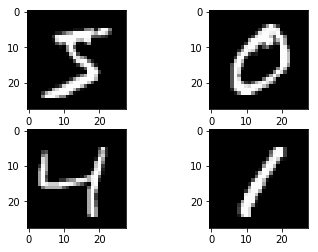

In [5]:
# inspecting the images
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))

In [23]:
y_train[2]

4

In [24]:
seed = 101
np.random.seed(seed)

In [25]:
# For MLP :
# reshaping the data (28*28 = 784) and converting the images to numpy arrays
num_pixels = x_train.shape[1]*x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0],num_pixels).astype('float32')
x_test = x_test.reshape(x_test.shape[0],num_pixels).astype('float32')

In [27]:
# normalizing the data        
x_train /= 255
x_test /= 255
print('train_dim:',x_train.shape)
print('test_dim:', x_test.shape)

train_dim: (60000, 784)
test_dim: (10000, 784)


In [33]:
# one-hot encode outputs
classes = 10
y_train = np_utils.to_categorical(y_train,classes)
y_test = np_utils.to_categorical(y_test,classes)
y_train.shape

(60000, 10)

In [34]:
# Defining the Baseline model 
def baseline_model():
    model = Sequential()
    model.add(Dense(512, input_dim=784, activation='relu'))
    model.add(Dense(classes,activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [42]:
# Summarizing the model
model = baseline_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Building the model
epochs = 50 # only for demo purposes
batch_size = 128
model = baseline_model()
history = model.fit(x_train,y_train,epochs = epochs, batch_size=batch_size, 
          validation_split=0.33, verbose=2)
         #callbacks=[tensorboard])
# #tensorboard --logdir=/Users/ram/Desktop/DEEPNN/keras_basic/ 
# -- to see the output on TensorBoard

Train on 40199 samples, validate on 19801 samples
Epoch 1/50
 - 6s - loss: 1.6670 - acc: 0.5900 - val_loss: 0.9763 - val_acc: 0.7904
Epoch 2/50
 - 6s - loss: 0.7424 - acc: 0.8240 - val_loss: 0.5703 - val_acc: 0.8594
Epoch 3/50
 - 6s - loss: 0.5098 - acc: 0.8712 - val_loss: 0.4400 - val_acc: 0.8865
Epoch 4/50
 - 6s - loss: 0.4196 - acc: 0.8881 - val_loss: 0.3828 - val_acc: 0.8955
Epoch 5/50
 - 6s - loss: 0.3754 - acc: 0.8964 - val_loss: 0.3515 - val_acc: 0.9006
Epoch 6/50
 - 7s - loss: 0.3479 - acc: 0.9029 - val_loss: 0.3323 - val_acc: 0.9053
Epoch 7/50
 - 7s - loss: 0.3285 - acc: 0.9073 - val_loss: 0.3163 - val_acc: 0.9102
Epoch 8/50
 - 6s - loss: 0.3145 - acc: 0.9113 - val_loss: 0.3076 - val_acc: 0.9104
Epoch 9/50
 - 6s - loss: 0.3025 - acc: 0.9135 - val_loss: 0.2981 - val_acc: 0.9140
Epoch 10/50
 - 6s - loss: 0.2930 - acc: 0.9153 - val_loss: 0.2891 - val_acc: 0.9167
Epoch 11/50
 - 6s - loss: 0.2841 - acc: 0.9184 - val_loss: 0.2826 - val_acc: 0.9187
Epoch 12/50
 - 6s - loss: 0.2758 - 

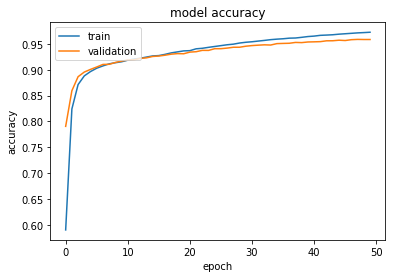

In [46]:
# Summarizing the Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','validation'], loc='upper left')
plt.show()

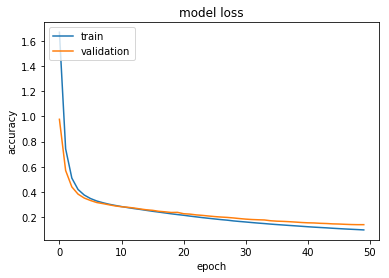

In [47]:
# Summarizing the loss function

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','validation'], loc='upper left')
plt.show()

In [ ]:
# Might be overfitting - need to make the model deep as well as introduce regularizations

In [48]:
# Evaluate the model performance
scores = model.evaluate(x_test,y_test,verbose=0)
print (scores)
print('Baseline Accuracy: {}'.format(scores[1]))

[0.12575048444755377, 0.96350000000000002]
Baseline Accuracy: 0.9635
